# Computer Vision 2022 Assignment 2: Image matching and retrieval

In this assignment, you will experiment with image feature detectors, descriptors and matching. There are 3 main parts to the assignment:

- matching an object in a pair of images
- searching for an object in a collection of images
- analysis and discussion of results

This assignment will have a minimum hurdle of 40%. You will fail if you can not reach the minimum hurdle.

## General instructions

As before, you will use this notebook to run your code and display your results and analysis. Again we will mark a PDF conversion of your notebook, referring to your code if necessary, so you should ensure your code output is formatted neatly. 

***When converting to PDF, include the outputs and analysis only, not your code.*** You can do this from the command line using the `nbconvert` command (installed as part of Jupyter) as follows:

    jupyter nbconvert Assignment2.ipynb --to pdf --no-input --TagRemovePreprocessor.remove_cell_tags 'remove-cell'
    # Or
    jupyter nbconvert Assignment2.ipynb --TagRemovePreprocessor.remove_cell_tags='{"remove_cell"}'

**Please do try this ccommond early before the last day! As the commend may be a little bit difference depending on your computer and the environment.**

This will also remove the preamble text from each question. We will use the `OpenCV` library to complete the prac. It has several built in functions that will be useful. You are expected to consult documentation and use them appropriately.

This being the second assignment, we have provided less strict direction this time and you have more flexibility to choose how you answer each question. However you still need to ensure the outputs and report are clear and easy to read. This includes:

- sizing, arranging and captioning image outputs appropriately
- explaining what you have done clearly and concisely
- clearly separating answers to each question

## Data

We have provided some example images for this assignment, available through a link on the MyUni assignment page. The images are organised by subject matter, with one folder containing images of book covers, one of museum exhibits, and another of urban landmarks. Within each category, there is a “Reference” folder containing a clean image of each object and a “Query” folder containing images taken on a mobile device. Within each category, images with the same name contain the same object (so 001.jpg in the Reference folder contains the same book as 001.jpg in the Query folder).
The data is a subset of the Stanford Mobile Visual Search Dataset which is available at 

<http://web.cs.wpi.edu/~claypool/mmsys-dataset/2011/stanford/index.html>. 

The full data set contains more image categories and more query images of the objects we have provided, which may be useful for your testing!

Do not submit your own copy of the data or rename any files or folders! For marking, we will assume the datasets are available in subfolders of the working directory using the same folder names provided.

Here is some general setup code, which you can edit to suit your needs.

In [2]:
# Numpy is the main package for scientific computing with Python. 
import numpy as np
import cv2
import time

# Imports all the methods we define in the file a2code.py
from a2code import *

# Matplotlib is a useful plotting library for python 
import matplotlib.pyplot as plt
# This code is to make matplotlib figures appear inline in the
# notebook rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots, can be changed
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [7]:
def draw_outline(ref, query, model):
    """
        Draw outline of reference image in the query image.
        This is just an example to show the steps involved.
        You can modify to suit your needs.
        Inputs:
            ref: reference image
            query: query image
            model: estimated transformation from query to reference image
    """
    h,w = ref.shape[:2]
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv2.perspectiveTransform(pts,model)
    
    img = query.copy()
    img = cv2.polylines(img,[np.int32(dst)],True,255,3, cv2.LINE_AA)
    plt.imshow(img, 'gray'), plt.show()

def draw_inliers(img1, img2, kp1, kp2, matches, matchesMask):
    """
        Draw inlier between images
        img1 / img2: reference/query  img
        kp1 / kp2: their keypoints
        matches : list of (good) matches after ratio test
        matchesMask: Inlier mask returned in cv2.findHomography() 
    """
    matchesMask = matchesMask.ravel().tolist()
    draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                    singlePointColor = None,
                    matchesMask = matchesMask, # draw only inliers
                    flags = 2)
    img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches,None,**draw_params)
    plt.imshow(img3, 'gray'),plt.show()


# Question 1: Matching an object in a pair of images (45%)

In this question, the aim is to accurately locate a reference object in a query image, for example:


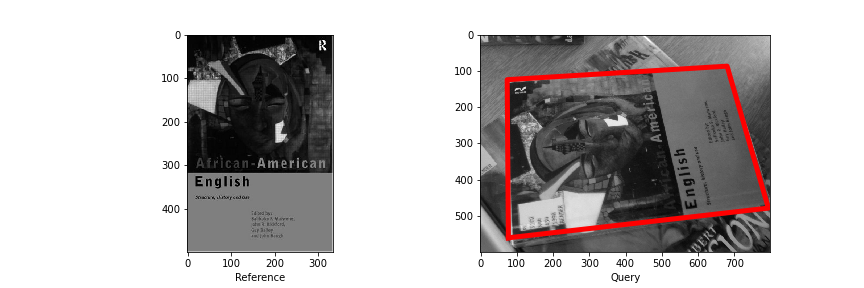

0. Download and read through the paper [ORB: an efficient alternative to SIFT or SURF](https://www.researchgate.net/publication/221111151_ORB_an_efficient_alternative_to_SIFT_or_SURF) by Rublee et al. You don't need to understand all the details, but try to get an idea of how it works. ORB combines the FAST corner detector (covered in week 4) and the BRIEF descriptor. BRIEF is based on similar ideas to the SIFT descriptor we covered week 4, but with some changes for efficiency.

1. [Load images] Load the first (reference, query) image pair from the "book_covers" category using opencv (e.g. `img=cv2.imread()`). Check the parameter option in "
cv2.imread()" to ensure that you read the gray scale image, since it is necessary for computing ORB features.

2. [Detect features] Create opencv ORB feature extractor by `orb=cv2.ORB_create()`. Then you can detect keypoints by `kp = orb.detect(img,None)`, and compute descriptors by `kp, des = orb.compute(img, kp)`. You need to do this for each image, and then you can use `cv2.drawKeypoints()` for visualization.

3. [Match features] As ORB is a binary feature, you need to use HAMMING distance for matching, e.g., `bf = cv2.BFMatcher(cv2.NORM_HAMMING)`. Then you are requried to do KNN matching (k=2) by using `bf.knnMatch()`. After that, you are required to use "ratio_test" to find good matches. By default, you can set `ratio=0.8`.

4. [Plot and analyze] You need to visualize the matches by using the `cv2.drawMatches()` function. Also you can change the ratio values, parameters in `cv2.ORB_create()`, and distance functions in `cv2.BFMatcher()`. Please discuss how these changes influence the match numbers.


image (ratio,ORB parameter,matcher value): 0.8 default 


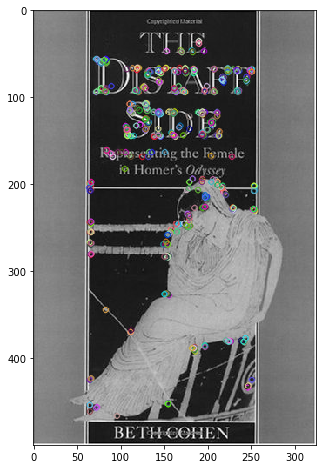

num of match point 131


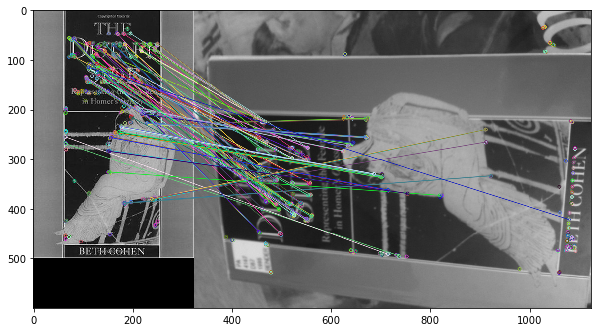

In [17]:
# Your code for descriptor matching tests here
print("image (ratio,ORB parameter,matcher value): 0.8 default ")

r1_1 = cv2.imread('book_covers/Reference/001.jpg')
q1_1 = cv2.imread('book_covers/Query/001.jpg')
r1_1 = cv2.cvtColor(r1_1, cv2.COLOR_BGR2GRAY)
q1_1 = cv2.cvtColor(q1_1, cv2.COLOR_BGR2GRAY)

# compute detector and descriptor
orb = cv2.ORB_create()

k_p_1 = orb.detect(r1_1, None)
k_p_2 = orb.detect(q1_1, None)

# find the keypoints and descriptors with ORB
k_p_1, des_1 = orb.compute(r1_1, k_p_1)
k_p_2, des_2 = orb.compute(q1_1, k_p_2)

# draw keypoints
output = cv2.drawKeypoints(r1_1, k_p_1, 0)
plt.imshow(output)
plt.show()

# create BFMatcher object
# bf = cv2.BFMatcher()
bf = cv2.BFMatcher(6)
# Match descriptors.
match_list = bf.knnMatch(des_1, des_2, k=2)
# match_list = sorted(match_list, key = lambda x : x.distance , reverse= False)

# Apply ratio test
ratio = 0.8
good_match = []
for m, n in match_list:
    if m.distance / n.distance < ratio:
        good_match.append(m)
# print(good_match)
# draw matches
# output = cv2.drawMatchesKnn(r1_1,k_p_1,q1_1,k_p_2,good_match,None)
print("num of match point",len(good_match))
output = cv2.drawMatches(r1_1, k_p_1, q1_1, k_p_2, good_match, None)
plt.imshow(output)
plt.show()

change ratio
original image: 0.8 default 
num of match point 109


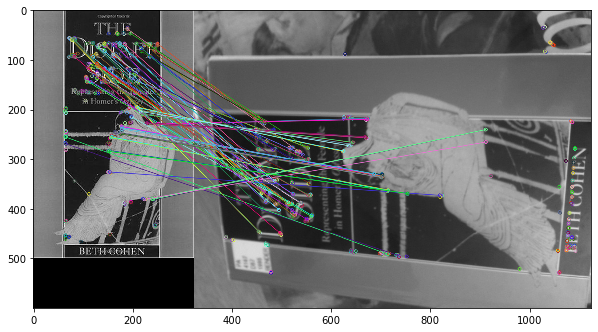

image (ratio,ORB parameter,matcher value): 0.5 default 
num of match point 14


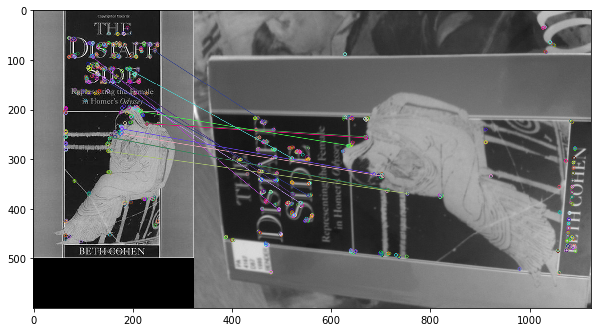

change ORB parameter
original image: 0.8 default 
num of match point 109


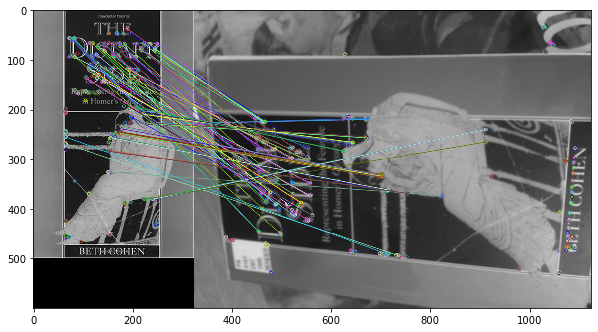

image (ratio,ORB parameter,matcher value): 0.8 1000 
num of match point 194


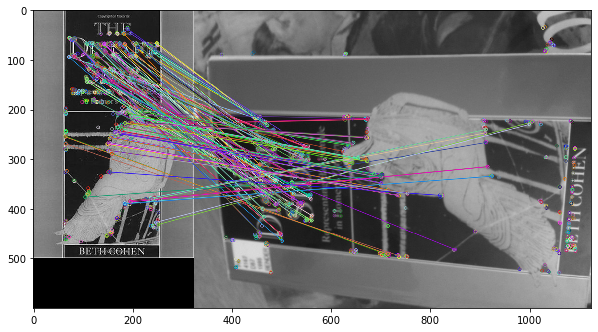

NORM_L1:
num of match point 93


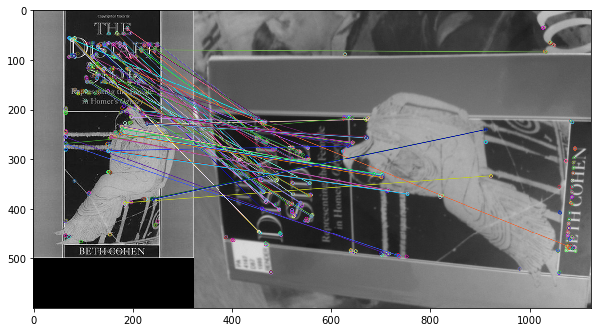

NORM_L2:
num of match point 50


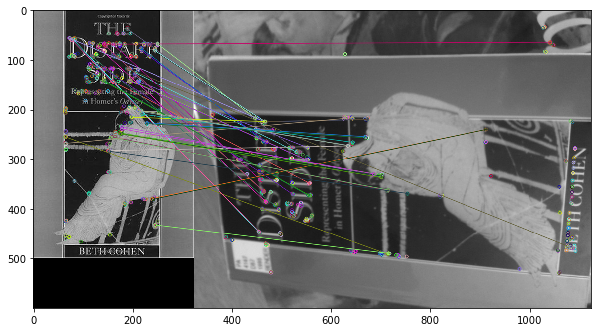

NORM_L2SQR:
num of match point 143


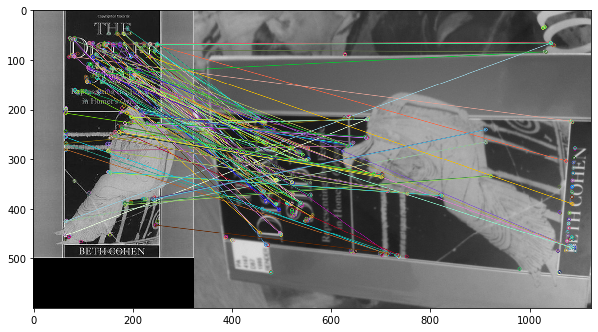

NORM_HAMMING:
num of match point 131


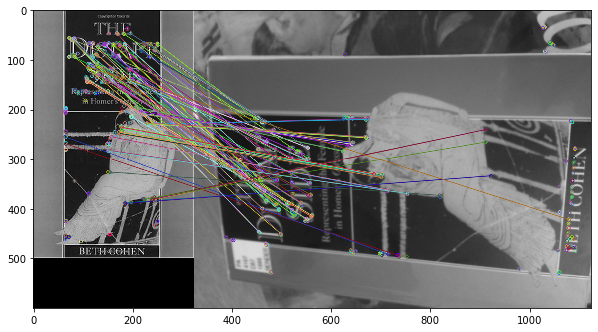

NORM_HAMMING2
num of match point 109


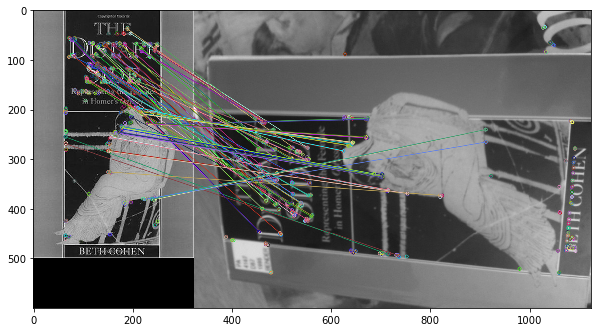

In [18]:

# load image at gray scale
# ques_1(0.8,0,7)

# Also you can change the ratio values, parameters in cv2.ORB_create(), and distance functions in cv2.BFMatcher(). Please discuss how these changes influence the match numbers.

# change the ratio values
print("change ratio")
print("original image: 0.8 default ")
ques_1(0.8,0,7)
print("image (ratio,ORB parameter,matcher value): 0.5 default ")
ques_1(0.5,0,7)


# change parameters in cv2.ORB_create()
print("change ORB parameter")
print("original image: 0.8 default ")
ques_1(0.8,0,7)
print("image (ratio,ORB parameter,matcher value): 0.8 1000 ")
ques_1(0.8,1000,7)

# # change distance functions in cv2.BFMatcher().
# print("change distance functions")

print("NORM_L1:")
ques_1(0.8,0,2)
print("NORM_L2:")
ques_1(0.8,0,4)
print("NORM_L2SQR:")
ques_1(0.8,0,5)
print("NORM_HAMMING:")
ques_1(0.8,0,6)
print("NORM_HAMMING2")
ques_1(0.8,0,7)

***Your explanation of what you have done, and your results, here***
<pre>
From the above changing, graphs shows that:
change the ratio values:
    we decrease the ratio from 0.8 to 0.5, we found that match numbers decrease, since the accept ratio of different in distance between match points decrease, which means some matches with bigger diffence in distance are now reject when we decrease the ratio.
change parameters in cv2.ORB_create():
    we increase the parameter to 1000, graphs shows more match points, while the running time of our code decrease, which helps increase the match accuracy but slow the system down in the same time.
change distance in bf matcher:
    we observe that different distance lead to different in match point number
    NORM_L1:
        num of match point 93
    NORM_L2:
        num of match point 50
    NORM_L2SQR:
        num of match point 143
    NORM_HAMMING:
        num of match point 131
    NORM_HAMMING2
        num of match point 109
    NORM_L2SQR have the largest number in match points
</pre>

5. Estimate a homography transformation based on the matches, using `cv2.findHomography()`. Display the transformed outline of the first reference book cover image on the query image, to see how well they match.

    - We provide a function `draw_outline()` to help with the display, but you may need to edit it for your needs.
    - Try the 'least squre method' option to compute homography, and visualize the inliers by using `cv2.drawMatches()`. Explain your results.
    - Again, you don't need to compare results numerically at this stage. Comment on what you observe visually.

131


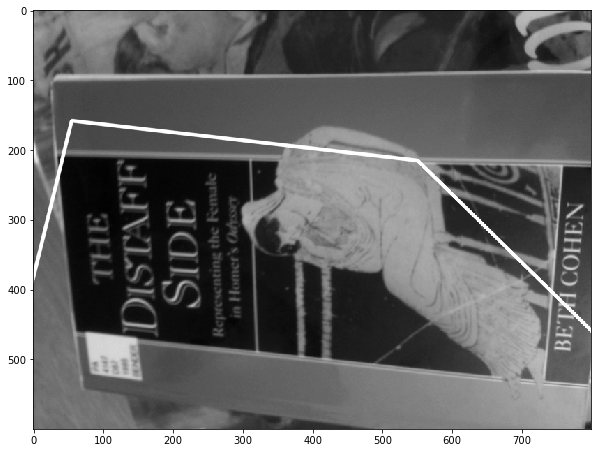

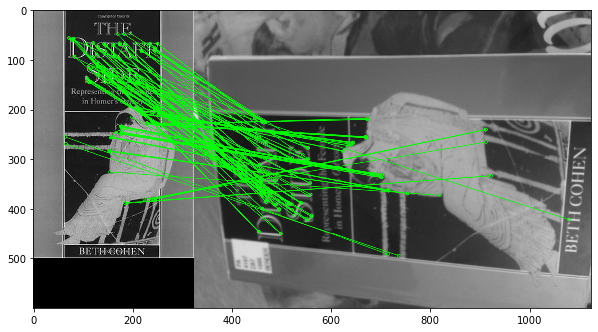

In [19]:
# Your code to display book location here
r1_1 = cv2.imread('book_covers/Reference/001.jpg')
q1_1 = cv2.imread('book_covers/Query/001.jpg')
r1_1 = cv2.cvtColor(r1_1, cv2.COLOR_BGR2GRAY)
q1_1 = cv2.cvtColor(q1_1, cv2.COLOR_BGR2GRAY)

# compute detector and descriptor
# if ORB_par == 0:
orb = cv2.ORB_create()
# else:
#     orb = cv2.ORB_create(ORB_par)
# k_p_1 = orb.detect(r1_1, None)
# k_p_2 = orb.detect(q1_1, None)

# find the keypoints and descriptors with ORB
k_p_1, des_1 = orb.detectAndCompute(r1_1, None)
k_p_2, des_2 = orb.detectAndCompute(q1_1, None)

# draw keypoints
# output = cv2.drawKeypoints(r1_1, k_p_1, 0)
# plt.imshow(output)
# plt.show()

# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING)

# Match descriptors.
match_list = bf.knnMatch(des_1, des_2, k=2)
# match_list = sorted(match_list, key = lambda x : x.distance , reverse= False)

# Apply ratio test
ratio = 0.8
good_match = []
for m, n in match_list:
    if m.distance / n.distance < ratio:
        good_match.append(m)
# using regular method (cv2.findHomography)
r_p = np.float32([ k_p_1[m.queryIdx].pt for m in good_match]).reshape(-1,1,2)
q_p = np.float32([ k_p_2[m.trainIdx].pt for m in good_match]).reshape(-1,1,2)
# for m in good_match:
#     print(k_p_1[m.queryIdx].pt)

homo, status = cv2.findHomography(r_p,q_p)
# print(homo)
print(len(status))
# draw outline
draw_outline(r1_1,q1_1,homo)

# draw inliers
draw_inliers(r1_1,q1_1,k_p_1,k_p_2,good_match,status)

***Your explanation of results here***
<pre>
  Observation of graphs:
    In inlier draw, points observe good matching while in outlier draw, the edge of the object doesn't match properly, none of the edge match on the book cover. According to the observation in inlier match draw, match points all gather in the title of the book cover, which make it hard to find outlier by least square method
  </pre>

6. Try the RANSAC option to compute homography. Change the RANSAC parameters, and explain your results. Print and analyze the inlier numbers. Hint: use cv2.RANSCA with cv2.findHomography.


number of inlier:131


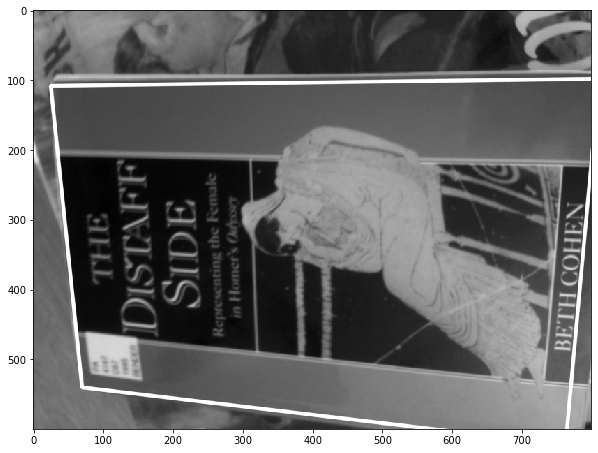

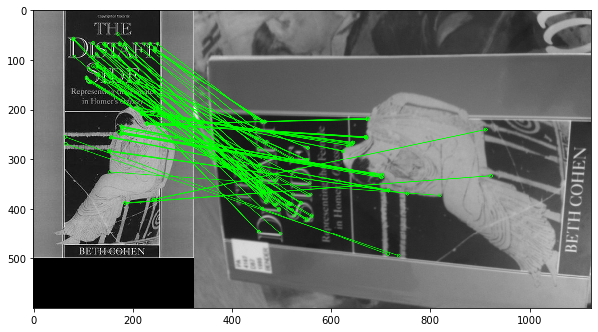

In [20]:
# Your code to display book location after RANSAC here
homo, status = cv2.findHomography(r_p,q_p, cv2.RANSAC, 5)
print("number of inlier:" + str(len(status)))
draw_outline(r1_1,q1_1,homo)
draw_inliers(r1_1,q1_1,k_p_1,k_p_2,good_match,status)

***Your explanation of what you have tried, and results here***
<pre>
    after using ransac, we find out that outlier is correctly detect. Numbers of inlier is 131. Ransac train the model and find the outlier and allow it to find the correct outlier.
    </pre>

7. Finally, try matching several different image pairs from the data provided, including at least one success and one failure case. For the failure case, test and explain what step in the feature matching has failed, and try to improve it. Display and discuss your findings.
    1. Hint 1: In general, the book covers should be the easiest to match, while the landmarks are the hardest.
    2. Hint 2: Explain why you chose each example shown, and what parameter settings were used.
    3. Hint 3: Possible failure points include the feature detector, the feature descriptor, the matching strategy, or a combination of these.

In [5]:
# Your results for other image pairs here
# Also you can change the ratio values, parameters in cv2.ORB_create(), and distance functions in cv2.BFMatcher(). Please discuss how these changes influence the match numbers.
def image_match(ref , que, ratio, ORB_par, norm_type):
    ref = cv2.cvtColor(ref,cv2.COLOR_BGR2GRAY)
    que = cv2.cvtColor(que,cv2.COLOR_BGR2GRAY)
    if ORB_par == 0:
        orb = cv2.ORB_create()
    else:
        orb = cv2.ORB_create(ORB_par)

    k_p_r = orb.detect(ref,None)
    k_p_q = orb.detect(que,None)
    k_p_r, des_r = orb.compute(ref, k_p_r)
    k_p_q, des_q = orb.compute(que, k_p_q)
    # bf = cv2.BFMatcher(cv2.NORM_HAMMING)
    bf = cv2.BFMatcher(norm_type)
    matches = bf.knnMatch(des_r,des_q,k=2)
    rat = ratio
    take = []
    for m,n in matches:
        if m.distance / n.distance < rat:
            take.append(m)

    print("match count: ",len(take))

    r_ptr = np.float32([ k_p_r[m.queryIdx].pt for m in take]).reshape(-1,1,2)
    q_ptr = np.float32([ k_p_q[m.trainIdx].pt for m in take]).reshape(-1,1,2)
    if len(r_ptr) < 4 or len(q_ptr) < 4:
        return
    homography, mask = cv2.findHomography(r_ptr,q_ptr, cv2.RANSAC, 5)

    draw_outline(ref,que,homography)
    draw_inliers(ref,que,k_p_r,k_p_q,take,mask)

success case 1:
image001.jpg
match count:  131


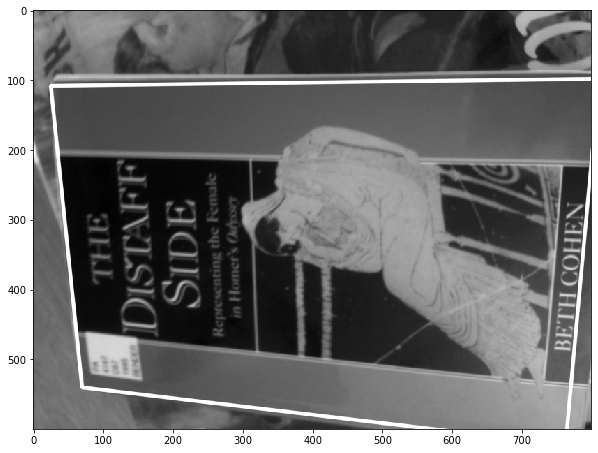

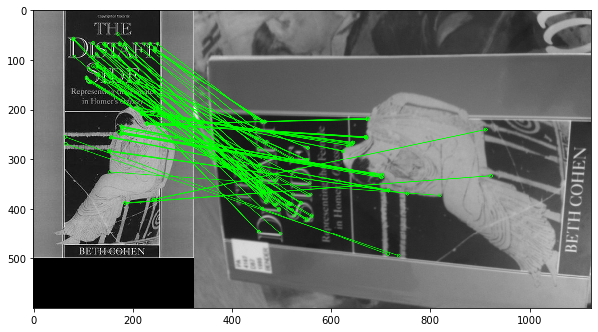

fail image 46
image046.jpg
match count:  13


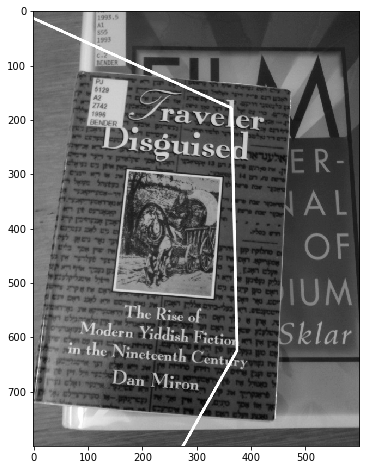

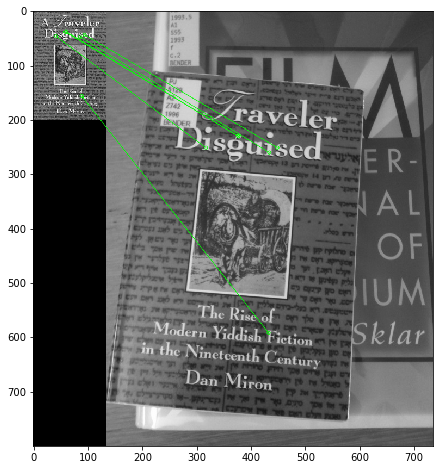

try to improve matching:
try changing larger ORB parameter(10000)
match count:  161


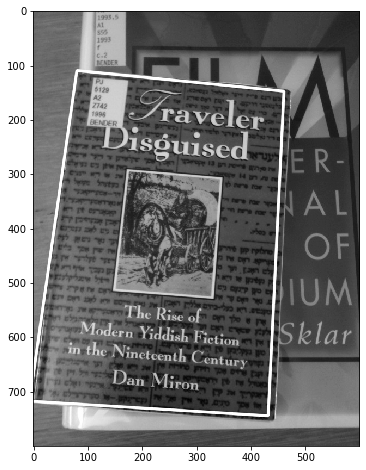

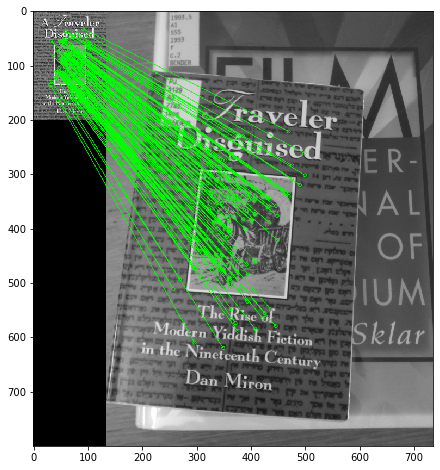

In [22]:
print("success case 1:")
num = 1
f_num = str(num).zfill(3)
print("image"+f_num+".jpg")
# name_r = 'book_covers/Reference/00'+str(i)+'.jpg'
# name_q = 'book_covers/Query/00'+str(i)+'.jpg'
r1_1 = cv2.imread('book_covers/Reference/'+f_num+'.jpg')
q1_1 = cv2.imread('book_covers/Query/'+f_num+'.jpg')
image_match(r1_1,q1_1,0.8,0,6)

print("fail image 46")
num = 46
f_num = str(num).zfill(3)
print("image"+f_num+".jpg")
# name_r = 'book_covers/Reference/00'+str(i)+'.jpg'
# name_q = 'book_covers/Query/00'+str(i)+'.jpg'
r1_1 = cv2.imread('book_covers/Reference/'+f_num+'.jpg')
q1_1 = cv2.imread('book_covers/Query/'+f_num+'.jpg')
image_match(r1_1,q1_1,0.8,0,6)

print("try to improve matching:")
# print("try changing larger ratio (0.93)")
# image_match(r1_1,q1_1,0.93,0,6)
print("try changing larger ORB parameter(10000)")
image_match(r1_1,q1_1,0.8,10000,6)

In [10]:
# print("fail image 55")
# num = 55
# f_num = str(num).zfill(3)
# print("image"+f_num+".jpg")
# # name_r = 'book_covers/Reference/00'+str(i)+'.jpg'
# # name_q = 'book_covers/Query/00'+str(i)+'.jpg'
# r1_1 = cv2.imread('book_covers/Reference/'+f_num+'.jpg')
# q1_1 = cv2.imread('book_covers/Query/'+f_num+'.jpg')
# image_match(r1_1,q1_1,0.8,0,6)
#
# print("try to improve matching: using L2SQR in distance")
# # print("fail image 46")
# num = 55
# f_num = str(num).zfill(3)
# print("image"+f_num+".jpg")
# # name_r = 'book_covers/Reference/00'+str(i)+'.jpg'
# # name_q = 'book_covers/Query/00'+str(i)+'.jpg'
#
# r1_1 = cv2.imread('book_covers/Reference/'+f_num+'.jpg')
# q1_1 = cv2.imread('book_covers/Query/'+f_num+'.jpg')
# image_match(r1_1,q1_1,0.8,0,5)

***Your explanation of results here***
<pre>
Image001: [success]
parameter setting:
    ratio : 0.8
    ORB_parameter: default
    norm type: 6 [norm hamming]
description:
    this image pair is success with default ratio and parameters,
    we can find inlier match and outlier match properly.

Image046: [fail]
parameter setting:
    ratio : 0.8
    ORB_parameter: default
    norm type: 6 [norm hamming]
description:
    This image pair is a fail case with default ratio. It shows similar
     fail in 2.5, can't find the outlier, and this time we still can't
     find the outlier even if we use RANSAC in find Homography function.
      One of the possibiliy is match points gather in one area, and for
      the others we don't have enough match points.

Image046: [improve]
parameter setting:
    ratio : 0.8
    ORB_parameter: 10000
    norm type: 6 [norm hamming]
description:
    In observation of failed in finding outlier with least square method,
     not enough of match points would be failure in feature detection.
Improvement:
    For improvement, we increase the ORB_parameter to increase the match point we have. and it finds the outlier properly.
    </pre>


# Question 2: What am I looking at? (40%)


<!--One application of feature matching is image retrieval. The goal of image retrieval is, given a query image of an object, to find all images in a database containing the same object, and return the results in ranked order (like a Google search). This is a huge research area but we will implement a very basic version of the problem based on the small dataset provided.-->

In this question, the aim is to identify an "unknown" object depicted in a query image, by matching it to multiple reference images, and selecting the highest scoring match. Since we only have one reference image per object, there is at most one correct answer. This is useful for example if you want to automatically identify a book from a picture of its cover, or a painting or a geographic location from an unlabelled photograph of it.

The steps are as follows:

1. Select a set of reference images and their corresponding query images.

    1. Hint 1: Start with the book covers, or just a subset of them.
    2. Hing 2: This question can require a lot of computation to run from start to finish, so cache intermediate results (e.g. feature descriptors) where you can.

2. Choose one query image corresponding to one of your reference images. Use RANSAC to match your query image to each reference image, and count the number of inlier matches found in each case. This will be the matching score for that image.

3. Identify the query object. This is the identity of the reference image with the highest match score, or "not in dataset" if the maximum score is below a threshold.

4. Repeat steps 2-3 for every query image and report the overall accuracy of your method (that is, the percentage of query images that were correctly matched in the dataset). Discussion of results should include both overall accuracy and individual failure cases.

    1. Hint 1: In case of failure, what ranking did the actual match receive? If we used a "top-k" accuracy measure, where a match is considered correct if it appears in the top k match scores, would that change the result?

<!--Code to implement this algorithm should mostly be written in a supporting file such as a2code.py. Call your code and display outputs in the notebook below.--> 


In [23]:
# Your code to identify query objects and measure search accuracy for data set here
# you can modify three vars below to modified to code
# img_accept = 1       #number of images you going to receive in output

# test code for step 3
# m_1 = best_match_ref(1,1)
# print(m_1)

#code for step 4
# 1 img_accept
print("top 1")
start = time.time()
result_1 = match_accuracy('book_covers',1,1000)*100
end = time.time()
# print("normal method have accuracy : "+"{:.2f}.format(result_1)"+"%\n")
print("normal method have accuracy : "+str(round(result_1,4))+"%\n")
print("time taken is "+time.strftime('%H:%M:%S', time.gmtime(end-start))+"\n" )

top 1
not in dataset   46
not in dataset   55
not in dataset   67
not in dataset   68
not in dataset   73
not in dataset   77
not in dataset   82
not in dataset   89
not in dataset   98
normal method have accuracy : 72.2772%

time taken is 00:15:33



In [24]:
k = 3    #set the top k
print("top k k:3")
start =time.time()
result_2 = match_accuracy('book_covers',k,1000)*100
end = time.time()
# print("top k ("+str(k)+") method have accuracy : "+"{:.2f}.format(result_2)"+"%\n")
print("top k ("+str(k)+") method have accuracy : "+str(round(result_2,4))+"%\n")
print("time taken is "+time.strftime('%H:%M:%S', time.gmtime(end-start))+"\n" )

top k k:3
not in dataset   46
not in dataset   55
not in dataset   67
not in dataset   68
not in dataset   73
not in dataset   77
not in dataset   82
not in dataset   89
not in dataset   98
top k (3) method have accuracy : 76.2376%

time taken is 00:12:21



***Your explanation of what you have done, and your results, here***
<pre>
overall accuracy:
    Normal method(top 1): 72.2772%
    top k (k = 3): 76.2376%
Failure case:
    Obserbation shows that some of the query can't match with there reference since not enough of match points or match numbers less than the threshold, which decrease the accuracy
observation:
    After using top k we found that the time of code running is longer but the accuracy of matching slightly increase. For instance we can see that in the 81st match(image 82) the matching have the second largest score. So we can say that using top k match score will increae the matching accuracy.
</pre>

5. Choose some extra query images of objects that do not occur in the reference dataset. Repeat step 4 with these images added to your query set. Accuracy is now measured by the percentage of query images correctly identified in the dataset, or correctly identified as not occurring in the dataset. Report how accuracy is altered by including these queries, and any changes you have made to improve performance.

In [3]:
print("Match image book cover with extra 5 image from landmark using default ORB parameter:")
start = time.time()
result_3 = match_accuracy_not_find('book_covers','landmarks',1,5,0)*100
end = time.time()
print("image found with other query have accuracy : "+str(round(result_3,4))+"%\n")
print("time taken is "+time.strftime('%H:%M:%S', time.gmtime(end-start))+"\n" )
print("Match image book cover with extra 5 image from landmark using 10000 ORB parameter:")

Match image book cover with extra 5 image from landmark using default ORB parameter:
not in dataset   37
not in dataset   46
not in dataset   55
not in dataset   57
not in dataset   59
not in dataset   61
not in dataset   67
not in dataset   68
not in dataset   69
not in dataset   70
not in dataset   72
not in dataset   76
not in dataset   77
not in dataset   80
not in dataset   82
not in dataset   83
not in dataset   84
not in dataset   89
not in dataset   91
not in dataset   93
not in dataset   96
not in dataset   97
not in dataset   100
not in dataset   101
landmarks/Query/001.jpg
not in dataset   1
found 1 not match  102
landmarks/Query/002.jpg
not in dataset   2
found 1 not match  103
landmarks/Query/003.jpg
not in dataset   3
found 1 not match  104
landmarks/Query/004.jpg
landmarks/Query/005.jpg
not in dataset   5
found 1 not match  106
image found with other query have accuracy : 61.3208%

time taken is 00:10:42

Match image book cover with extra 5 image from landmark using 1000

In [ ]:
# print("Match image book cover with extra 5 image from landmark using SIFT:")
# start = time.time()
# result_3 = match_accuracy_not_find('book_covers','landmarks',1,5,0)*100
# end = time.time()
# print("image found with other query have accuracy : "+str(round(result_3,4))+"%\n")
# print("time taken is "+time.strftime('%H:%M:%S', time.gmtime(end-start))+"\n" )
# print("Match image book cover with extra 5 image from landmark using 10000 ORB parameter:")

In [25]:
# Your code to run extra queries and display results here
start = time.time()
result_3 = match_accuracy_not_find('book_covers','landmarks',1,5,10000)*100
end = time.time()
print("image found with other query have accuracy : "+str(round(result_3,4))+"%\n")
print("time taken is "+time.strftime('%H:%M:%S', time.gmtime(end-start))+"\n" )

not in dataset   68
not in dataset   71
not in dataset   75
not in dataset   76
not in dataset   77
landmarks/Query/001.jpg
not in dataset   1
found 1 not match  102
landmarks/Query/002.jpg
not in dataset   2
found 1 not match  103
landmarks/Query/003.jpg
not in dataset   3
found 1 not match  104
landmarks/Query/004.jpg
not in dataset   4
found 1 not match  105
landmarks/Query/005.jpg
not in dataset   5
found 1 not match  106
image found with other query have accuracy : 93.3962%

time taken is 00:44:26



    ***Your explanation of results and any changes made here***
   <pre>
   Accuracy calculation:
        (match image in the origin dataset + extra image result not in dataset)
        _________________________________________________________________________
        ( dataset size + extra image number)

   Calculation :
        information:
            dataset: book_covers
            extra dataset: landmarks
            extra query number: 5
        observation:
            we found that accuracy decrease, but in logic if our system can correctly detect out the extra query as "not in dataset", we will have a slightly increase in accuracy.
        improvment:
            For improvement we increase the ORB_parameter to 10000, after increasing the ORB_parameter, accuracy have a large improvement (hit to 92.4528%)but the run time also become very long.

   </pre>


6. Repeat step 4 and 5 for at least one other set of reference images from museum_paintings or landmarks, and compare the accuracy obtained. Analyse both your overall result and individual image matches to diagnose where problems are occurring, and what you could do to improve performance. Test at least one of your proposed improvements and report its effect on accuracy.


In [26]:
# Your code to search images and display results here

print("match landmarks with extra 5 query from book covers in default ORB parameter")
start = time.time()
result_4 = match_accuracy_not_find('landmarks','book_covers',1,5,0)*100
end = time.time()
print("image found with other query have accuracy : "+str(round(result_4,4))+"%\n")
print("time taken is "+time.strftime('%H:%M:%S', time.gmtime(end-start))+"\n" )



print("match landmarks with extra 5 query from book covers in ORB parameter 10000")
start = time.time()
result_4 = match_accuracy_not_find('landmarks','book_covers',1,5,10000)*100
end = time.time()
print("image found with other query have accuracy : "+str(round(result_4,4))+"%\n")
print("time taken is "+time.strftime('%H:%M:%S', time.gmtime(end-start))+"\n" )


match landmarks with extra 5 query from book covers in default ORB parameter
not in dataset   1
not in dataset   2
not in dataset   3
not in dataset   4
not in dataset   5
not in dataset   6
not in dataset   7
not in dataset   8
not in dataset   9
not in dataset   10
not in dataset   11
not in dataset   12
not in dataset   15
not in dataset   16
not in dataset   17
not in dataset   20
not in dataset   23
not in dataset   24
not in dataset   26
not in dataset   27
not in dataset   28
not in dataset   29
not in dataset   30
not in dataset   32
not in dataset   33
not in dataset   34
not in dataset   36
not in dataset   37
not in dataset   38
not in dataset   39
not in dataset   41
not in dataset   43
not in dataset   44
not in dataset   45
not in dataset   47
not in dataset   48
not in dataset   49
not in dataset   50
not in dataset   52
not in dataset   53
not in dataset   57
not in dataset   58
not in dataset   59
not in dataset   60
not in dataset   64
not in dataset   65
not in datas

In [11]:
print("match landmarks with extra 5 query from book covers in ORB parameter 10000 for top k (3)")
start = time.time()
result_4 = match_accuracy_not_find('landmarks','book_covers',3,5,10000)*100
end = time.time()
print("image found with other query have accuracy : "+str(round(result_4,4))+"%\n")
print("time taken is "+time.strftime('%H:%M:%S', time.gmtime(end-start))+"\n" )

match landmarks with extra 5 query from book covers in ORB parameter 10000 for top k (3)
not in dataset   2
not in dataset   3
not in dataset   5
not in dataset   7
not in dataset   15
not in dataset   16
not in dataset   17
not in dataset   23
not in dataset   27
not in dataset   33
not in dataset   36
not in dataset   37
not in dataset   41
not in dataset   53
not in dataset   55
not in dataset   56
not in dataset   59
not in dataset   62
not in dataset   63
not in dataset   66
not in dataset   67
not in dataset   80
not in dataset   82
not in dataset   84
not in dataset   87
not in dataset   89
not in dataset   97
book_covers/Query/001.jpg
book_covers/Query/002.jpg
book_covers/Query/003.jpg
book_covers/Query/004.jpg
book_covers/Query/005.jpg
not in dataset   5
found 1 not match  105
image found with other query have accuracy : 50.4762%

time taken is 00:26:09



***Your description of what you have done, and explanation of results, here***
<pre>
Observation:
    After changing dataset, we found that code is not working anymore, the accuracy is low and become useless(15.2381%),since for the book covers dataset the threshold we use are high for landmarks, in default orb parameter and threshold will show large number of query is not in dataset.
Improvement:
    So for improvement, we can use top k or increase our parameter in ORB.
    increase the orb parameter:
        we increase the orb parameter and dedicate the system running speed. After changing, now it have high accuracy.(42.8571%)
    Using top K:
        After using 10000 as the parameter, we use top k to try to further improve our matching, now we have accuracy 50.4762%. which is another improvement


</pre>

# Question 3 (10%)

In Question 1, We hope that `ratio_test` can provide reasonable results for RANSAC. However, if it fails, the RANSAC may not get good results. In this case, we would like to try an improved matching method to replace the `ratio_test`. Here, the `gms_matcher` is recommened. You need to implement it and save results of 3 image pairs (you can select any image pairs from the dataset),
where you new method is better than 'ratio_test'.


1. Hint 1: `cv2.xfeatures2d.matchGMS()` can be used, but you need to install the opencv-contrib by `pip install opencv-contrib-python`
2. Hint 2: You do not need use KNN matching, because GMS does not require second nearest neighbor.
3. Hint 3: You need to change the parameters in `cv2.ORB_create()` for best results. See the setting in Github.
4. Hint 4: If your are interested in more details. Read the paper "GMS: Grid-based Motion Statistics for Fast, Ultra-robust Feature Correspondence", and the Github "https://github.com/JiawangBian/GMS-Feature-Matcher".

In [27]:
def ransac_match(r_num):
    q_num = r_num
    ref = cv2.imread('book_covers/Reference/' + (str(r_num)).zfill(3) + '.jpg')
    que = cv2.imread('book_covers/Query/' + (str(q_num)).zfill(3) + '.jpg')
    orb = cv2.ORB_create()
    k_p_r, des_r = orb.detectAndCompute(ref, None)
    k_p_q, des_q = orb.detectAndCompute(que, None)
    bf = cv2.BFMatcher(cv2.NORM_HAMMING)
    match_list = bf.knnMatch(des_r, des_q, k=2)

    ratio = 0.8
    good_match = []
    for m, n in match_list:
        if m.distance / n.distance < ratio:
            good_match.append(m)
    # using regular method (cv2.findHomography)
    print("match num:",len(good_match))
    # draw_inliers(ref,que,k_p_r,k_p_q,good_match,status)
    plt.imshow(cv2.drawMatches(ref,k_p_r,que,k_p_q,good_match,None))
    plt.show()

ratio : 37
match num: 12


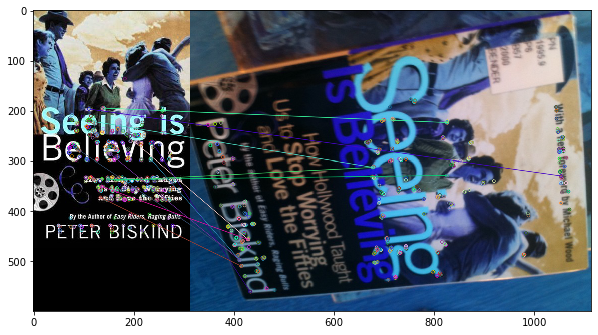

GMS : 37
match num:  159


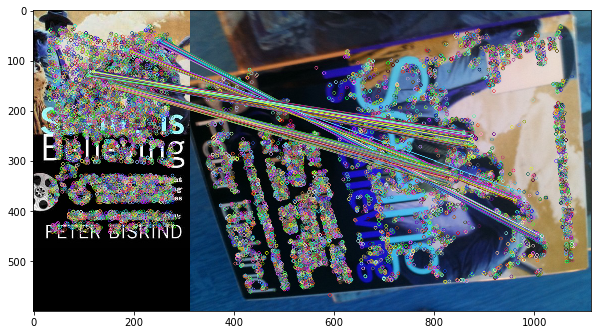

ratio : 46
match num: 13


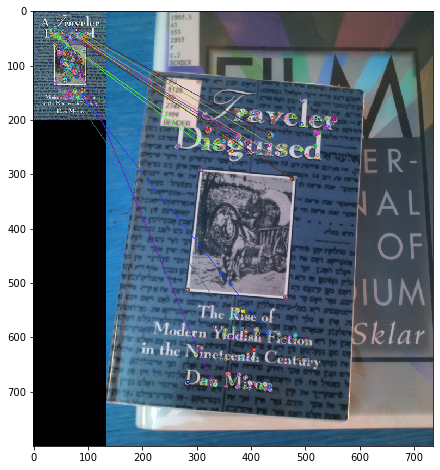

GMS : 46
match num:  326


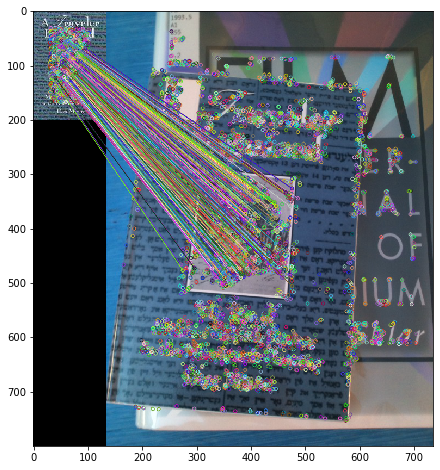

ratio : 55
match num: 2


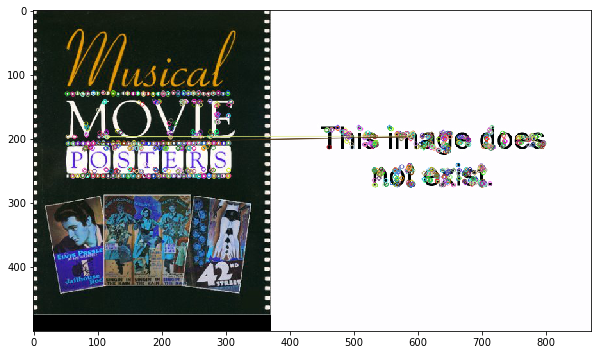

GMS : 55
match num:  0


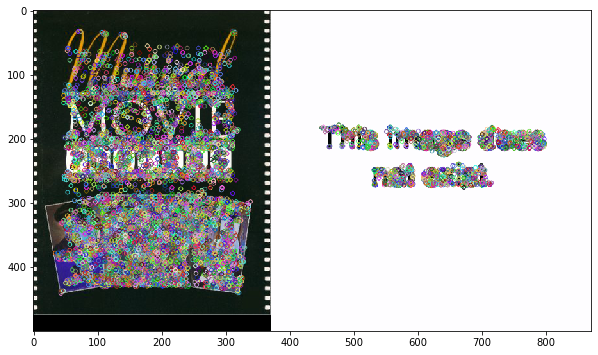

In [30]:
data = 37
print("ratio :",data)
ransac_match(data)
print("GMS :",data)
ratio_match(data)

data = 46
print("ratio :",data)
ransac_match(data)
print("GMS :",data)
ratio_match(data)

data = 55
print("ratio :",data)
ransac_match(data)
print("GMS :",data)
ratio_match(data)

# ransac_match(46)
# ratio_match(46)
# ratio_match(72)
# ratio_match(79)
# ratio_match(55)


# print(ratio_match_1tom(3))

    ***Your results here**
   <pre>
    In three image 37,46 and 55, 37 and 46 are images that have not enough match point when we use ratio test for query and reference matching, while 55 are the one should show not in dataset
    Observation:
        From observation we can see that every image that match now have more match points compare with using normal ratio test, which increase the accuracy of image matching also in 55, ratio test still find match points while gms have no match point which increase ability to detect not in dataset image.
    For the new method "gms", it have positive impact to our matching and have ability to find more match points
    </pre>

<# Question 4: Reflection Questions (5%)

1. Describe the hardest situation you faced during the first two assignments. And how you overcome it? (3%)


2. How do you plan to finish the assignment to meet tight deadline? (2%)>

<pre>
    Hard situation:
        So the hardest situation I found is when we have a piece of code, we need extremely long time to run it and wait, and sometimes its wrong. Also the understanding is hard when it convert to image.
    Overcome strategies:
        To overcome the time consuming, I check the code before everyone to prevent the time wasting cost by simple mistake cause the error. Moreover, I spend more and more time on research of codes and understanding.
    Plan:
        About the plan to finish assignment tightly, I double check the instructions and try my best to not missing the key points. Moreover, I improve the code as much as I can to increase the accuracy and mind the run time of each code, try to decrease the running time, also I start the assignment pretty start since this assignment is worth to spend time on, thought provoking and open mind.
</pre>